In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
%matplotlib inline
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'E:\\Complete Machine Learning'

In [3]:
os.chdir('E:\Complete Machine Learning\datasets\Backorder')

In [177]:
train=pd.read_csv('Training.csv',index_col='sku')
test=pd.read_csv('Test.csv',index_col='sku')

In [5]:
train.head(5)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,,,,,,,,,,,,,,,,
1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [6]:
test.head(5)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,,,,,,,,,,,,,,,,
3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


In [6]:
round(train.describe(),2)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1687860.00,1586967.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00
mean,496.11,7.87,44.05,178.12,344.99,506.36,55.93,175.03,341.73,525.27,52.77,2.04,-6.87,-6.44,0.63
std,29615.23,7.06,1342.74,5026.55,9795.15,14378.92,1928.20,5192.38,9613.17,14838.61,1254.98,236.02,26.56,25.84,33.72
min,-27256.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-99.00,-99.00,0.00
25%,4.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.66,0.00
50%,15.00,8.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,4.00,0.00,0.00,0.82,0.81,0.00
75%,80.00,9.00,0.00,4.00,12.00,20.00,4.00,15.00,31.00,47.00,3.00,0.00,0.97,0.95,0.00
max,12334404.00,52.00,489408.00,1427612.00,2461360.00,3777304.00,741774.00,1105478.00,2146625.00,3205172.00,313319.00,146496.00,1.00,1.00,12530.00


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1687861 entries, 1026827 to (1687860 rows)
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1687860 non-null  float64
 1   lead_time          1586967 non-null  float64
 2   in_transit_qty     1687860 non-null  float64
 3   forecast_3_month   1687860 non-null  float64
 4   forecast_6_month   1687860 non-null  float64
 5   forecast_9_month   1687860 non-null  float64
 6   sales_1_month      1687860 non-null  float64
 7   sales_3_month      1687860 non-null  float64
 8   sales_6_month      1687860 non-null  float64
 9   sales_9_month      1687860 non-null  float64
 10  min_bank           1687860 non-null  float64
 11  potential_issue    1687860 non-null  object 
 12  pieces_past_due    1687860 non-null  float64
 13  perf_6_month_avg   1687860 non-null  float64
 14  perf_12_month_avg  1687860 non-null  float64
 15  local_bo_qty       16878

In [178]:
df=train.copy()

In [179]:
tf=test.copy()

In [180]:
#3 Replacing -99.00 with NaN value in perf_6_month_avg and perf_12_month_avg
df['perf_6_month_avg'].replace(-99.00,np.nan,inplace=True)
df['perf_12_month_avg'].replace(-99.00,np.nan,inplace=True)

In [181]:
tf['perf_6_month_avg'].replace(-99.00,np.nan,inplace=True)
tf['perf_12_month_avg'].replace(-99.00,np.nan,inplace=True)

In [182]:
print('Missing % of lead_time is {} %'.format(round(df['lead_time'].isnull().sum()/len(df['lead_time'])*100),2))
print('Missing % of perf_6_month_avg is {} %'.format(round(df['perf_6_month_avg'].isnull().sum()/len(df['perf_6_month_avg'])*100)))
print('Missing % of perf_12_month_avg is {} %'.format(round(df['perf_12_month_avg'].isnull().sum()/len(df['perf_12_month_avg'])*100)))

Missing % of lead_time is 6 %
Missing % of perf_6_month_avg is 8 %
Missing % of perf_12_month_avg is 7 %


In [183]:
num_feat=df.select_dtypes(include='number').columns.to_list()
cat_feat=df.select_dtypes(include='object').columns.to_list()

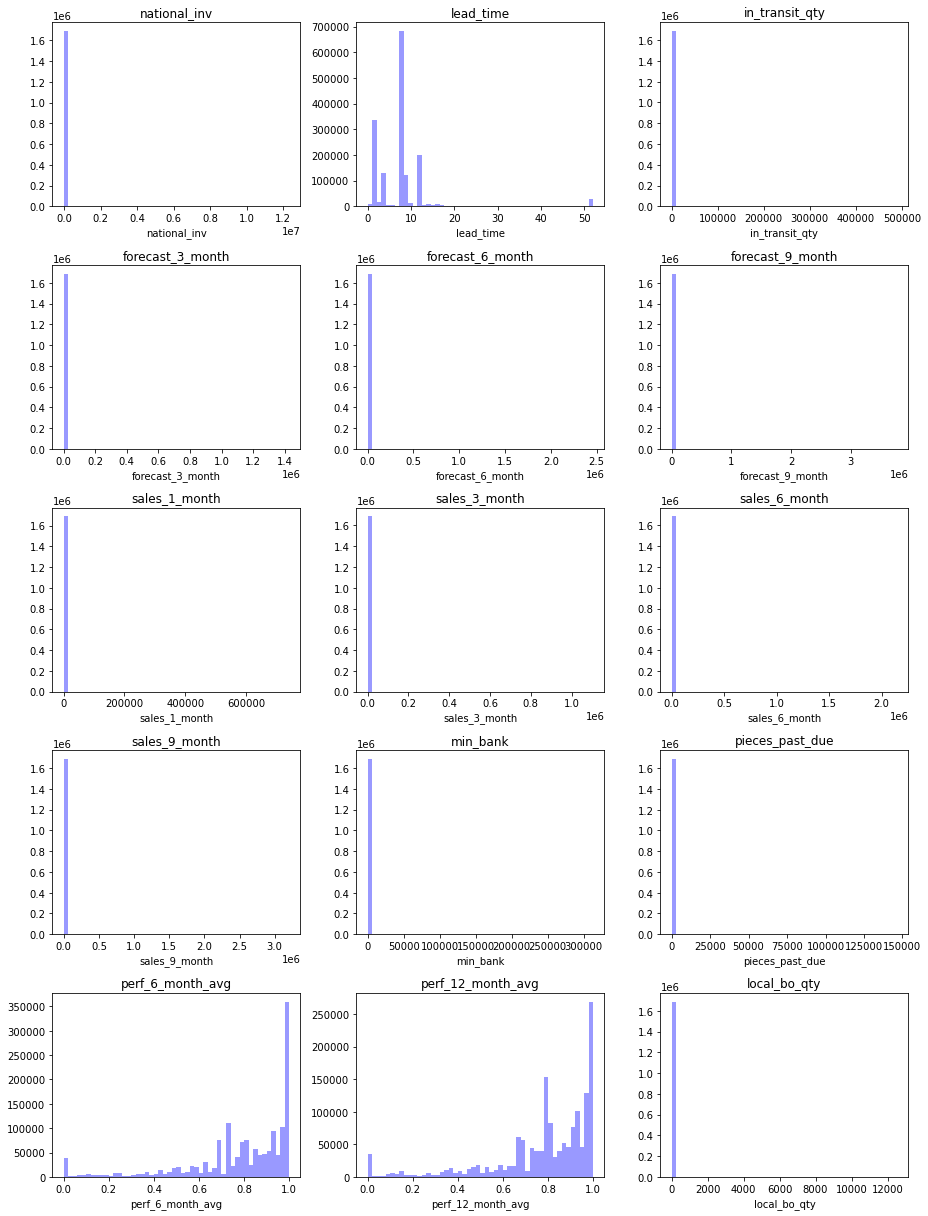

In [15]:
plt.figure(figsize=(13,17))
for i,feat in enumerate(num_feat):
    plt.subplot(5,3,i+1)
    sns.distplot(df[feat],kde=False,color='blue')
    plt.tight_layout()
    plt.title(feat)

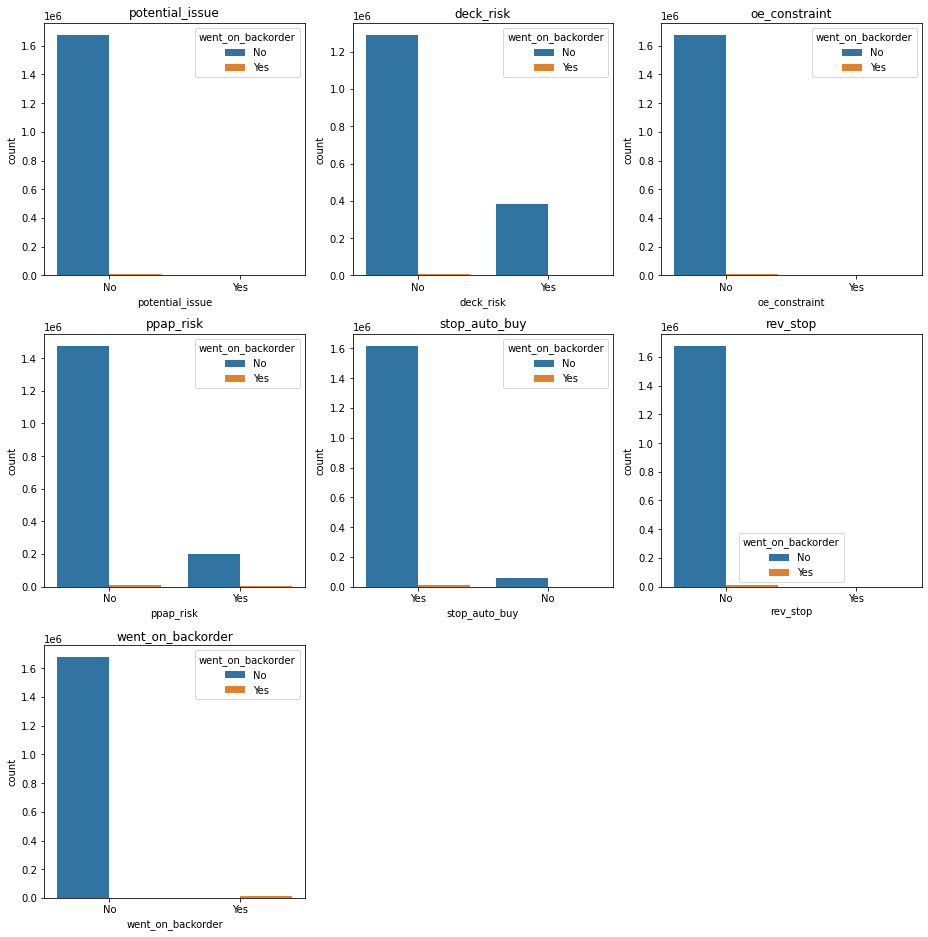

In [16]:
plt.figure(figsize=(13,17))
for i,feat in enumerate(cat_feat):
    plt.subplot(4,3,i+1)
    sns.countplot(x=feat,data=df,hue='went_on_backorder')
    plt.tight_layout()
    plt.title(feat)

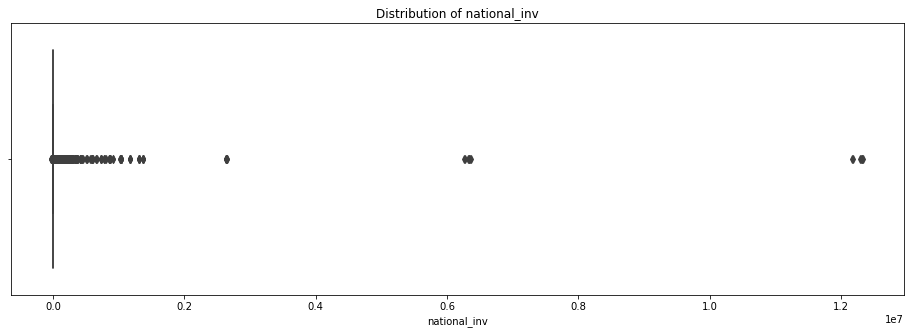

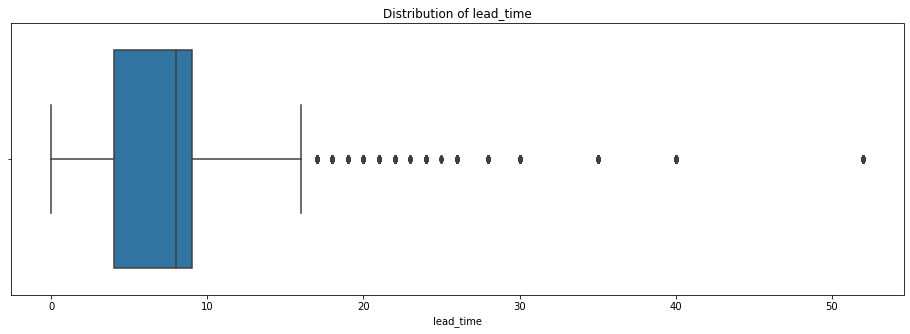

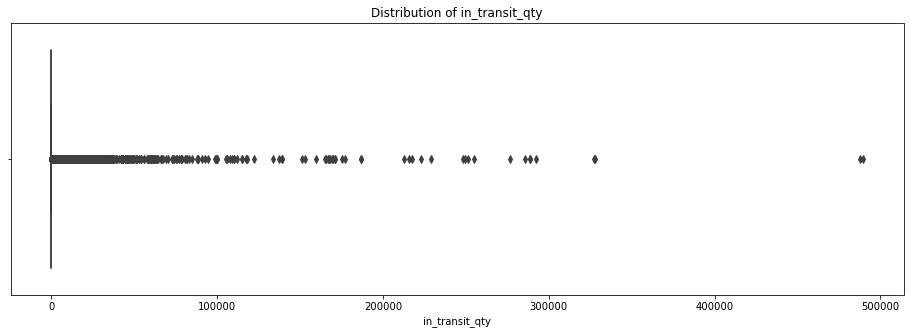

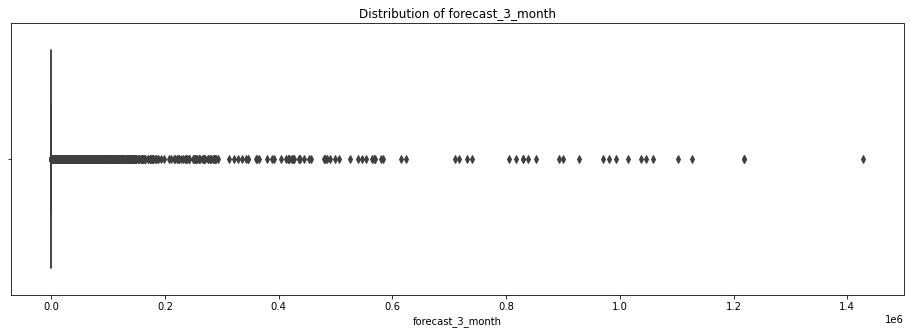

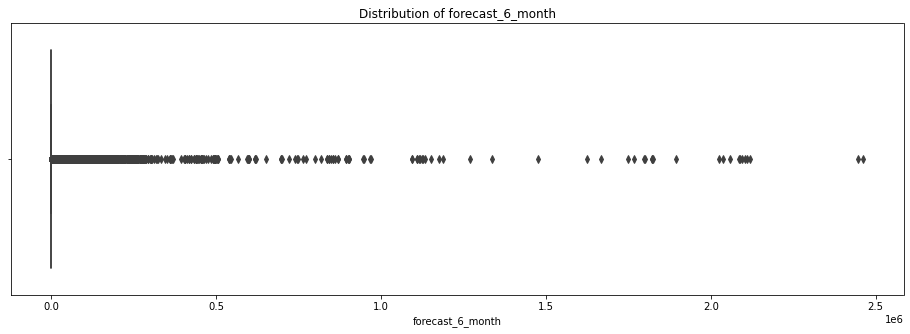

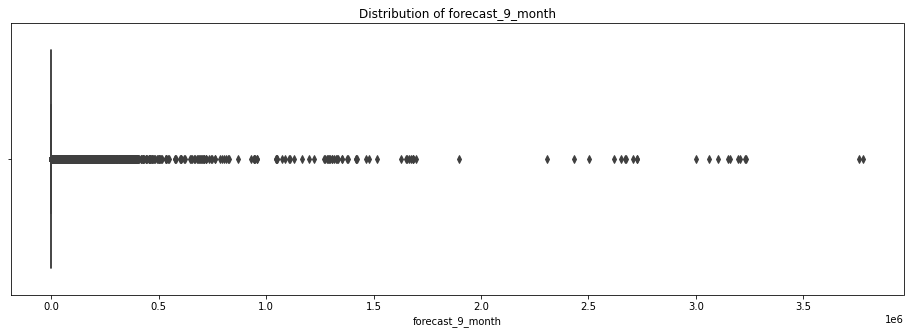

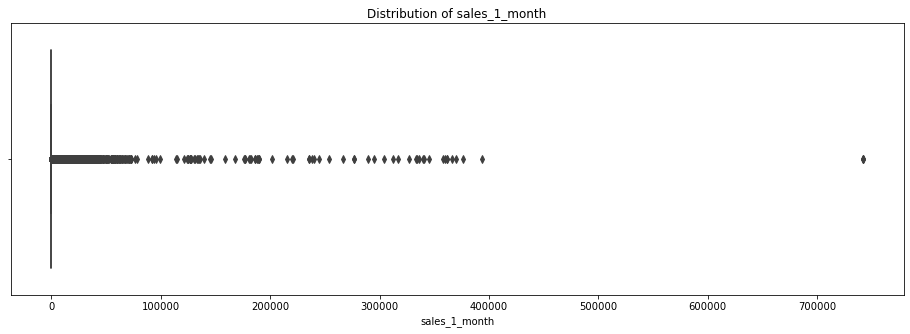

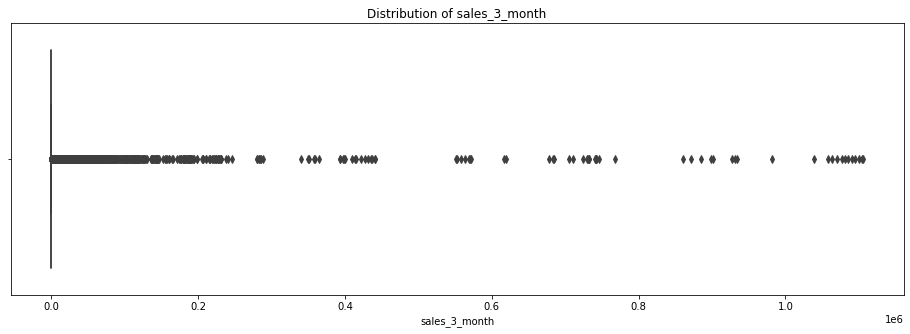

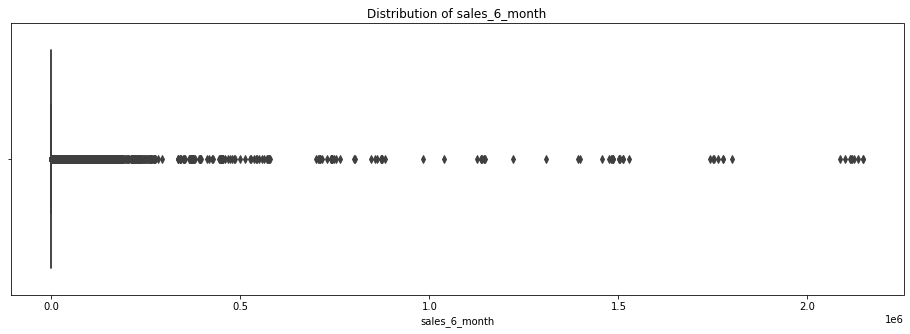

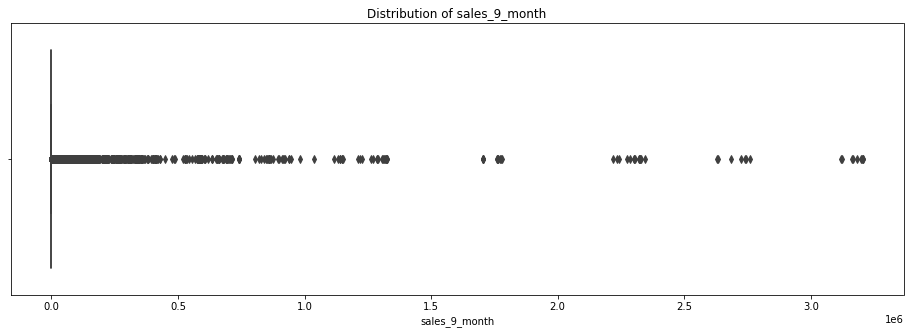

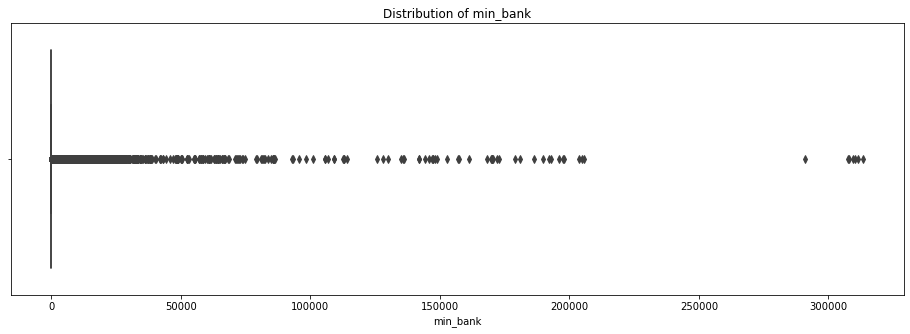

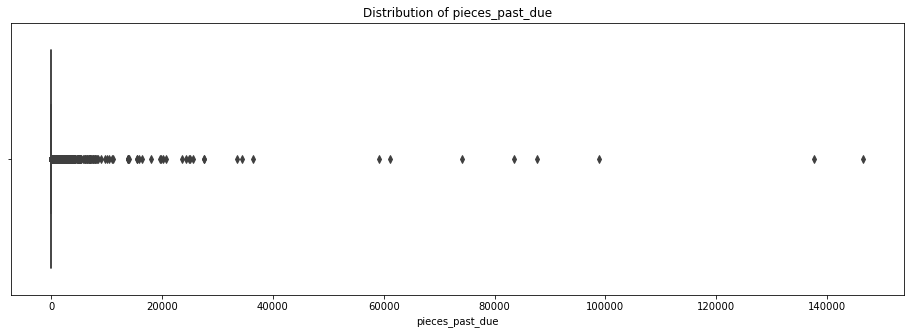

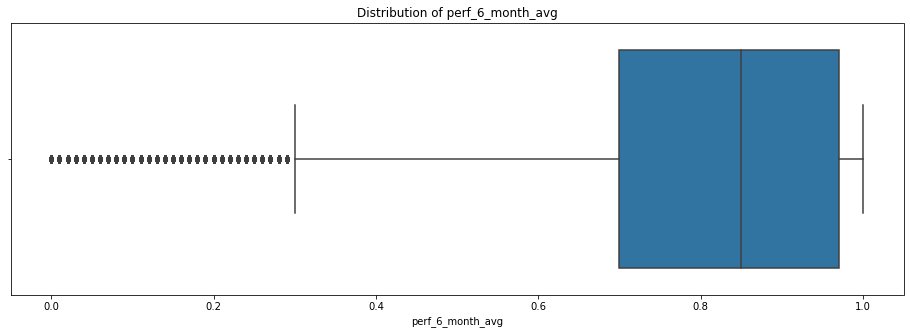

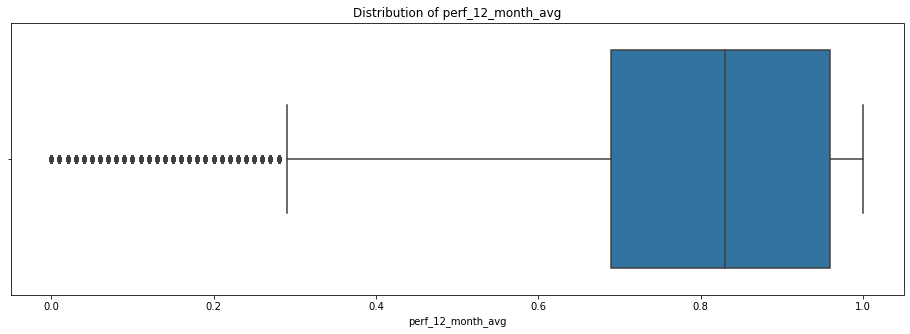

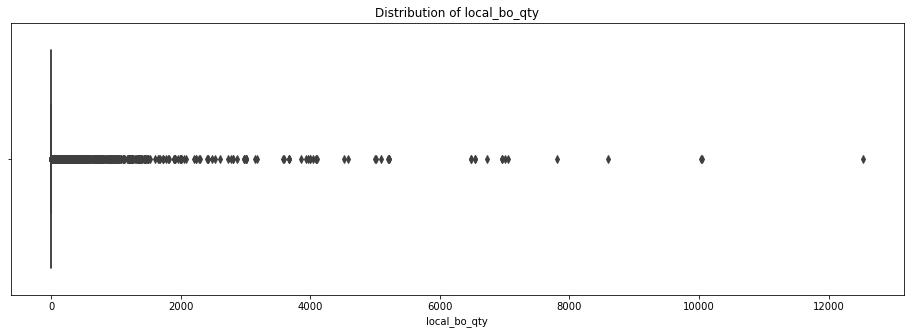

In [17]:
for feat in num_feat:
    plt.figure(figsize=(16,5))
    sns.boxplot(df[feat])
    plt.title('Distribution of {}'.format(feat))
    plt.show()

In [117]:
df['lead_time']=df['lead_time'].fillna(df['lead_time'].median())
df['perf_6_month_avg']=df['perf_6_month_avg'].fillna(df['perf_6_month_avg'].median())
df['perf_12_month_avg']=df['perf_12_month_avg'].fillna(df['perf_12_month_avg'].median())

In [118]:
tf['lead_time']=tf['lead_time'].fillna(tf['lead_time'].median())
tf['perf_6_month_avg']=tf['perf_6_month_avg'].fillna(tf['perf_6_month_avg'].median())
tf['perf_12_month_avg']=tf['perf_12_month_avg'].fillna(tf['perf_12_month_avg'].median())

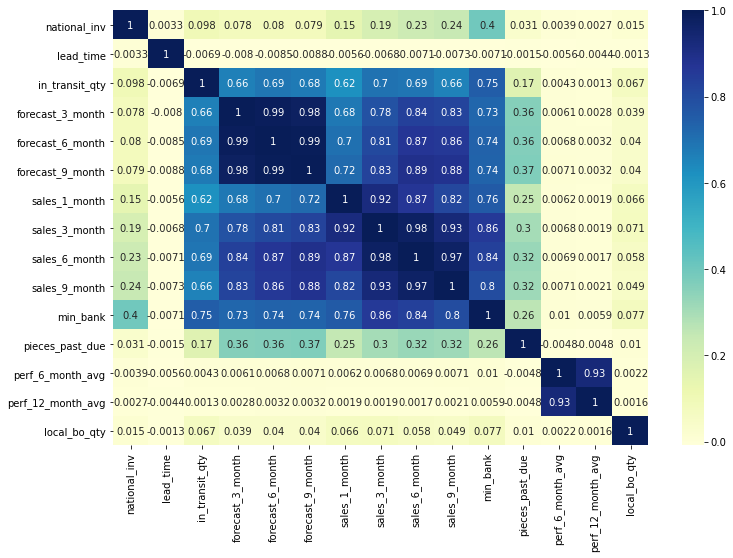

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

Forecast_3_month, forecast_6_month,forecast_9_month are highly correlated to one another.
In_transit_qty,sales_3_month and min_bank are correlated to each other.
sales_1_month,sales_3_month,sales_6_month and sales_9_month are highly correlated.
perf_6_month_avg,perf_12_month_avg are highly correlated to each other.

In [198]:
df1=df[:500000]

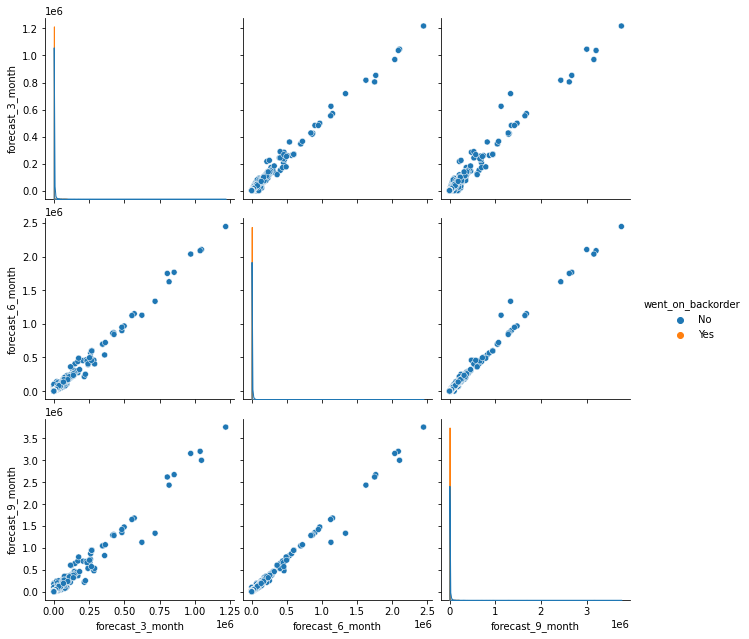

In [199]:
forecasts=['forecast_3_month','forecast_6_month','forecast_9_month']
sns.pairplot(df1,vars=forecasts,hue='went_on_backorder',size=3)
plt.show()

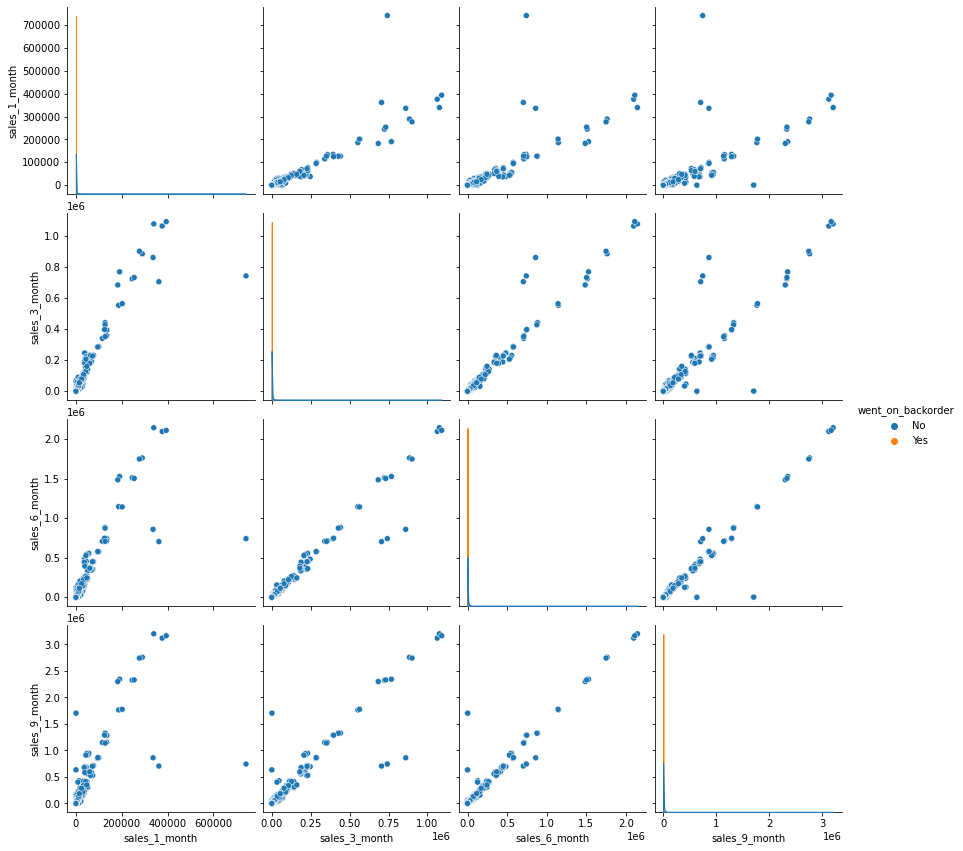

In [200]:
sales=['sales_1_month','sales_3_month','sales_6_month','sales_9_month']
sns.pairplot(df1,vars=sales,hue='went_on_backorder',size=3)
plt.show()

In [201]:
no_bo=df1[df1['went_on_backorder']=='No']
is_bo=df1[df1['went_on_backorder']=='Yes']

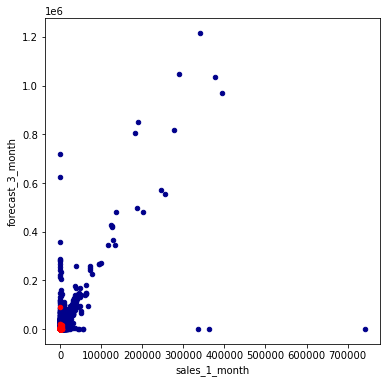

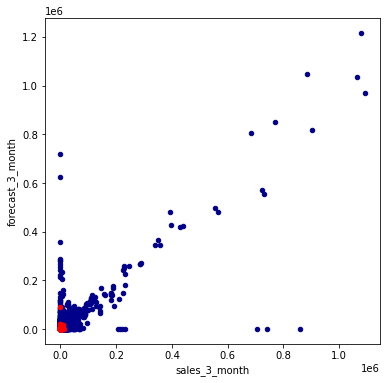

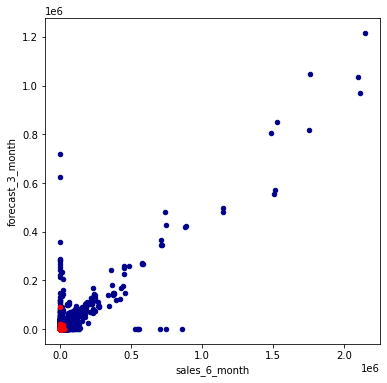

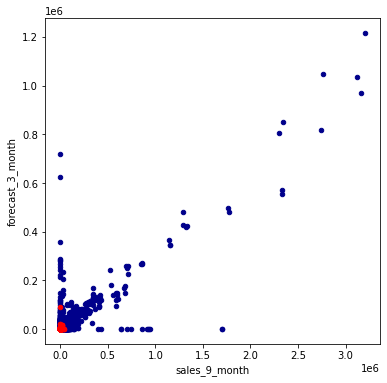

In [207]:
for col in sales:
    fig=plt.figure(figsize=(6,6))
    ax=fig.gca()
    no_bo.plot(kind='scatter',x=col,y='forecast_3_month',ax=ax,color='DarkBlue',legend=True)
    is_bo.plot(kind='scatter',x=col,y='forecast_3_month',ax=ax,color='Red',legend=True)

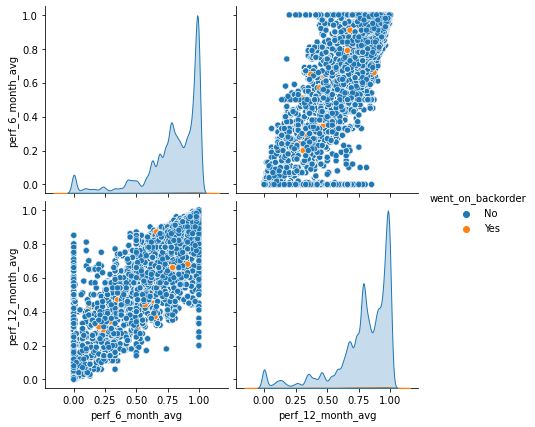

In [208]:
perf=['perf_6_month_avg','perf_12_month_avg']
sns.pairplot(df1,vars=perf,hue='went_on_backorder',size=3)
plt.show()

<AxesSubplot:xlabel='perf_6_month_avg', ylabel='perf_12_month_avg'>

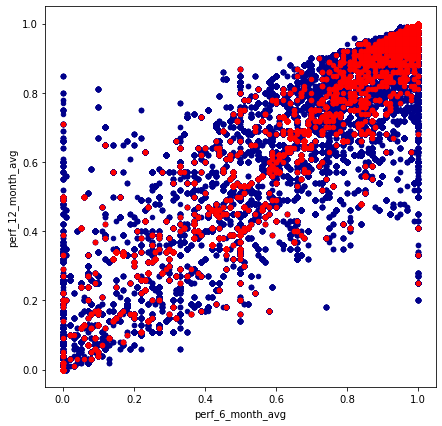

In [209]:
fig = plt.figure(figsize=(7, 7))
ax = fig.gca()
no_bo.plot(kind='scatter', x='perf_6_month_avg', y='perf_12_month_avg', ax=ax, color='DarkBlue')
is_bo.plot(kind='scatter', x='perf_6_month_avg', y='perf_12_month_avg', ax=ax, color='Red')

### Feature Engineering

In [119]:
df['forecast']=(df['forecast_3_month']+ df['forecast_6_month']+df['forecast_9_month'])/3

In [120]:
tf['forecast']=(tf['forecast_3_month']+ tf['forecast_6_month']+tf['forecast_9_month'])/3

In [121]:
df.drop(['forecast_3_month','forecast_6_month','forecast_9_month'],axis=1,inplace=True)

In [122]:
tf.drop(['forecast_3_month','forecast_6_month','forecast_9_month'],axis=1,inplace=True)

In [123]:
df=df[:-1]

In [124]:
tf=tf[:-1]

In [125]:
df['sales']=(df['sales_1_month']+df['sales_3_month']+df['sales_6_month']+df['sales_9_month'])/4

In [126]:
tf['sales']=(tf['sales_1_month']+tf['sales_3_month']+tf['sales_6_month']+tf['sales_9_month'])/4

In [127]:
df.drop(['sales_1_month','sales_3_month','sales_6_month','sales_9_month'],axis=1,inplace=True)

In [128]:
tf.drop(['sales_1_month','sales_3_month','sales_6_month','sales_9_month'],axis=1,inplace=True)

In [129]:
df['perf']=(df['perf_6_month_avg']+df['perf_12_month_avg'])/2

In [130]:
tf['perf']=(tf['perf_6_month_avg']+tf['perf_12_month_avg'])/2

In [131]:
df.drop(['perf_6_month_avg','perf_12_month_avg'],axis=1,inplace=True)

In [132]:
tf.drop(['perf_6_month_avg','perf_12_month_avg'],axis=1,inplace=True)

In [133]:
for feat in cat_feat:
    df[feat]=df[feat].map({
    'Yes':1,
    'No':0
})

In [134]:
for feat in cat_feat:
    tf[feat]=tf[feat].map({
    'Yes':1,
    'No':0
})

In [37]:
df.head(5)

,national_inv,lead_time,in_transit_qty,min_bank,potential_issue,pieces_past_due,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,forecast,sales,perf
sku,,,,,,,,,,,,,,,,
1026827,0.0,8.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0,0.0,0.840
1043384,2.0,9.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0,0.0,0.990
1043696,2.0,8.0,0.0,0.0,0,0.0,0.0,1,0,0,1,0,0,0.0,0.0,0.840
1043852,7.0,8.0,0.0,1.0,0,0.0,0.0,0,0,0,1,0,0,0.0,0.0,0.115
1044048,8.0,8.0,0.0,2.0,0,0.0,0.0,1,0,0,1,0,0,0.0,1.0,0.840


In [38]:
tf.head(5)

,national_inv,lead_time,in_transit_qty,min_bank,potential_issue,pieces_past_due,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,forecast,sales,perf
sku,,,,,,,,,,,,,,,,
3285085,62.0,8.0,0.0,1.0,0,0.0,0.0,1,0,0,1,0,0,0.0,0.0,0.840
3285131,9.0,8.0,0.0,1.0,0,0.0,0.0,0,0,1,0,0,0,0.0,0.0,0.840
3285358,17.0,8.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0,0.0,0.935
3285517,9.0,2.0,0.0,0.0,0,0.0,0.0,0,0,1,1,0,0,0.0,0.5,0.765
3285608,2.0,8.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0,0.0,0.625


In [39]:
df.shape,tf.shape

((1687860, 16), (242075, 16))

In [40]:
for feature in df.columns:
    print(feature,df[feature].skew())

national_inv 340.2858003326191
lead_time 4.695413484039694
in_transit_qty 166.18340424761558
min_bank 131.21264893012795
potential_issue 43.103711789548576
pieces_past_due 412.39190039252696
local_bo_qty 165.19054793748316
deck_risk 1.2860556809377883
oe_constraint 82.98335299658959
ppap_risk 2.327643294041299
stop_auto_buy -4.966736885500256
rev_stop 48.02060537030535
went_on_backorder 12.102385054363372
forecast 140.46943666897454
sales 136.61649134928643
perf -1.7121497343439487


In [41]:
for feature in tf.columns:
    print(feature,tf[feature].skew())

national_inv 339.6947116358796
lead_time 4.702114248616544
in_transit_qty 170.1115305009347
min_bank 129.25666870161027
potential_issue 54.306270667284316
pieces_past_due 381.874264135855
local_bo_qty 93.73943630058585
deck_risk 1.5144457278717673
oe_constraint 71.74674837509954
ppap_risk 2.3588242656206795
stop_auto_buy -4.757696317082973
rev_stop 47.31240188827217
went_on_backorder 9.33112916073432
forecast 137.80402659346007
sales 137.00153753360283
perf -1.6831620977355397


In [34]:
cat_feat

['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [135]:
skewed_list=['national_inv','in_transit_qty','min_bank','pieces_past_due','local_bo_qty','forecast','sales']
log_list=[]
for item in skewed_list:
    log_list.append(df.columns.get_loc(item))

In [136]:
log_list

[0, 2, 3, 5, 6, 13, 14]

In [137]:
def log_transform(a):
    sign =np.sign(a[log_list])
    a[log_list]=np.log(1.0+abs(a[log_list]))*sign
    return a

In [138]:
df_log=np.apply_along_axis(log_transform,1,df)

In [139]:
tf_log=np.apply_along_axis(log_transform,1,tf)

In [140]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(df_log)

In [141]:
df_log=sc.transform(df_log)

In [142]:
tf_log=sc.transform(tf_log)

In [143]:
df_log=pd.DataFrame(df_log,columns=df.columns)

In [144]:
tf_log=pd.DataFrame(tf_log,columns=tf.columns)

In [52]:
df_log.head(5)

,national_inv,lead_time,in_transit_qty,min_bank,potential_issue,pieces_past_due,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,forecast,sales,perf
0,-1.540521,0.017553,-0.422918,-0.664839,-0.023187,-0.10469,-0.094957,-0.545873,-0.012049,-0.37061,0.193779,-0.020815,-0.082072,-0.642378,-0.868529,0.252055
1,-0.997624,0.163710,-0.422918,-0.664839,-0.023187,-0.10469,-0.094957,-0.545873,-0.012049,-0.37061,0.193779,-0.020815,-0.082072,-0.642378,-0.868529,0.929495
2,-0.997624,0.017553,-0.422918,-0.664839,-0.023187,-0.10469,-0.094957,1.831928,-0.012049,-0.37061,0.193779,-0.020815,-0.082072,-0.642378,-0.868529,0.252055
3,-0.512930,0.017553,-0.422918,-0.252825,-0.023187,-0.10469,-0.094957,-0.545873,-0.012049,-0.37061,0.193779,-0.020815,-0.082072,-0.642378,-0.868529,-3.022236
4,-0.454726,0.017553,-0.422918,-0.011812,-0.023187,-0.10469,-0.094957,1.831928,-0.012049,-0.37061,0.193779,-0.020815,-0.082072,-0.642378,-0.551055,0.252055


In [53]:
tf_log.head(5)

,national_inv,lead_time,in_transit_qty,min_bank,potential_issue,pieces_past_due,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,forecast,sales,perf
0,0.506878,0.017553,-0.422918,-0.252825,-0.023187,-0.10469,-0.094957,1.831928,-0.012049,-0.370610,0.193779,-0.020815,-0.082072,-0.642378,-0.868529,0.252055
1,-0.402660,0.017553,-0.422918,-0.252825,-0.023187,-0.10469,-0.094957,-0.545873,-0.012049,2.698252,-5.160512,-0.020815,-0.082072,-0.642378,-0.868529,0.252055
2,-0.112196,0.017553,-0.422918,-0.664839,-0.023187,-0.10469,-0.094957,-0.545873,-0.012049,-0.370610,0.193779,-0.020815,-0.082072,-0.642378,-0.868529,0.681100
3,-0.402660,-0.859390,-0.422918,-0.664839,-0.023187,-0.10469,-0.094957,-0.545873,-0.012049,2.698252,0.193779,-0.020815,-0.082072,-0.642378,-0.682819,-0.086664
4,-0.997624,0.017553,-0.422918,-0.664839,-0.023187,-0.10469,-0.094957,-0.545873,-0.012049,-0.370610,0.193779,-0.020815,-0.082072,-0.642378,-0.868529,-0.718941


In [145]:
X_train=df_log.drop('went_on_backorder',axis=1)
y_train=df['went_on_backorder']

In [146]:
X_test=tf_log.drop('went_on_backorder',axis=1)
y_test=tf['went_on_backorder']

In [147]:
X_train.to_csv('X_train.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

In [4]:
X_train=pd.read_csv('X_train.csv')
X_test=pd.read_csv('X_test.csv')
y_train=pd.read_csv('y_train.csv')
y_test=pd.read_csv('y_test.csv')

In [58]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train_bal,y_train_bal=sm.fit_sample(X_train,y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_bal.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_bal.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_bal == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_bal == 0)))

After OverSampling, the shape of train_X: (3353134, 15)
After OverSampling, the shape of train_y: (3353134,) 

After OverSampling, counts of label '1': 1676567
After OverSampling, counts of label '0': 1676567


In [64]:
y_train_bal=pd.DataFrame(y_train_bal,columns=["went_on_backorder"])

sku
3285085    0
3285131    0
3285358    0
3285517    0
3285608    0
          ..
3526987    0
3526988    0
3526989    0
3526990    0
3526991    0
Name: went_on_backorder, Length: 242075, dtype: int64

In [65]:
X_train_bal.to_csv('X_train_1.csv',index=False)
y_train_bal.to_csv('y_train_1.csv',index=False)
X_test.to_csv('X_test_1.csv',index=False)
y_test.to_csv('y_test_1.csv',index=False)

In [95]:
X_train_full=pd.read_csv('X_train_1.csv')
y_train_full=pd.read_csv('y_train_1.csv')
X_test_full=pd.read_csv('X_test_1.csv')
y_test_full=pd.read_csv('y_test_1.csv')

In [96]:
y_train_full=np.array(y_train_full).ravel()
y_test_full= np.array(y_test_full).ravel()

### KNNClassifier

### On Balanced Dataset

In [7]:
from random import sample
X_train_sampled=X_train_full.sample(frac=0.2)
y_train_sampled=y_train_full[X_train_sampled.index,]

In [8]:
from sklearn.metrics import classification_report,plot_confusion_matrix,f1_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [9]:
X_train_sampled.shape,X_train_full.shape

((670627, 15), (3353134, 15))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     64101
           1       0.99      0.95      0.97     70025

    accuracy                           0.97    134126
   macro avg       0.97      0.97      0.97    134126
weighted avg       0.97      0.97      0.97    134126



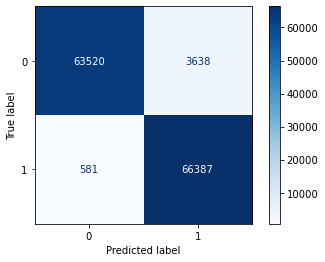

In [10]:
X_train,X_val,y_train,y_val = train_test_split(X_train_sampled,y_train_sampled,test_size=0.2,random_state=42)
model=KNeighborsClassifier(n_neighbors=5,weights='uniform').fit(X_train,y_train)
predictions=model.predict(X_val)
print(classification_report(predictions,y_val))
disp=plot_confusion_matrix(model,X_val,y_val,display_labels=[0,1],
                          cmap=plt.cm.Blues,values_format='.0f')
plt.show()

### Combining OverSampling and UnderSampling

In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,plot_confusion_matrix,f1_score,recall_score

In [7]:
over=SMOTE(sampling_strategy=0.1)
X_train_over,y_train_over=over.fit_sample(X_train,y_train)

In [8]:
under=RandomUnderSampler(sampling_strategy=0.5)
X_train_sampled,y_train_sampled=under.fit_sample(X_train_over,y_train_over)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    231481
           1       0.46      0.12      0.18     10594

    accuracy                           0.96    242075
   macro avg       0.71      0.55      0.58    242075
weighted avg       0.94      0.96      0.94    242075



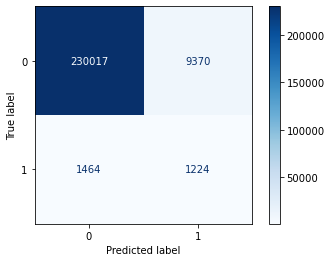

In [9]:
model=KNeighborsClassifier(n_neighbors=5,weights='uniform')
model.fit(X_train_sampled,y_train_sampled)
predictions=model.predict(X_test)
print(classification_report(predictions,y_test))
disp=plot_confusion_matrix(model,X_test,y_test,display_labels=[0,1],
                          cmap=plt.cm.Blues,values_format='.0f')
plt.show()

In [8]:
over=SMOTE(sampling_strategy=0.2)
X_train_over,y_train_over=over.fit_sample(X_train,y_train)

In [9]:
under=RandomUnderSampler(sampling_strategy=0.5)
X_train_sampled,y_train_sampled=under.fit_sample(X_train_over,y_train_over)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    234547
           1       0.37      0.13      0.19      7528

    accuracy                           0.97    242075
   macro avg       0.67      0.56      0.59    242075
weighted avg       0.95      0.97      0.96    242075



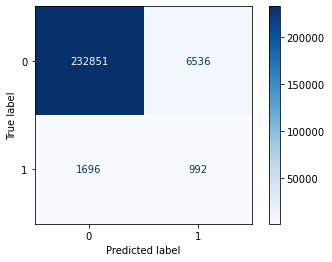

In [12]:
model=KNeighborsClassifier(n_neighbors=5,weights='uniform')
model.fit(X_train_sampled,y_train_sampled)
predictions=model.predict(X_test)
print(classification_report(predictions,y_test))
disp=plot_confusion_matrix(model,X_test,y_test,display_labels=[0,1],
                          cmap=plt.cm.Blues,values_format='.0f')
plt.show()

### Bagging Classifier

In [118]:
from sklearn.ensemble import BaggingClassifier

In [169]:
over=SMOTE(sampling_strategy=0.6)
X_train_over,y_train_over=over.fit_sample(X_train,y_train)

In [171]:
under=RandomUnderSampler(sampling_strategy=0.6)
X_train_sampled,y_train_sampled=under.fit_sample(X_train_over,y_train_over)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    239387
           1       0.25      0.12      0.17      2688

    accuracy                           0.99    242075
   macro avg       0.62      0.56      0.58    242075
weighted avg       0.98      0.99      0.98    242075



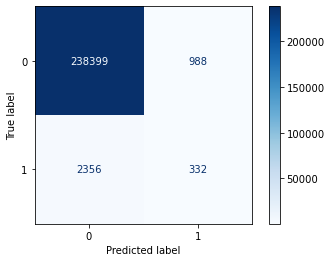

In [172]:
model= BaggingClassifier()
model.fit(X_train_sampled,y_train_sampled)
predictions=model.predict(X_test)
print(classification_report(y_test,predictions))
disp=plot_confusion_matrix(model,X_test,y_test,display_labels=[0,1],
                          cmap=plt.cm.Blues,values_format='.0f')
plt.show()

### BalancedBaggingClassifier

In [11]:
from imblearn.ensemble import BalancedBaggingClassifier

In [173]:
over=SMOTE(sampling_strategy=0.2)
X_train_over,y_train_over=over.fit_sample(X_train,y_train)

In [174]:
under=RandomUnderSampler(sampling_strategy=0.6)
X_train_sampled,y_train_sampled=under.fit_sample(X_train_over,y_train_over)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    239387
           1       0.20      0.30      0.24      2688

    accuracy                           0.98    242075
   macro avg       0.60      0.64      0.61    242075
weighted avg       0.98      0.98      0.98    242075



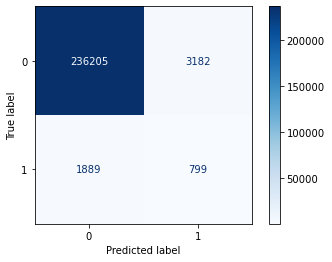

In [175]:
model= BalancedBaggingClassifier(n_estimators=10)
model.fit(X_train_sampled,y_train_sampled)
predictions=model.predict(X_test)
print(classification_report(y_test,predictions))
disp=plot_confusion_matrix(model,X_test,y_test,display_labels=[0,1],
                          cmap=plt.cm.Blues,values_format='.0f')
plt.show()

### BaggingClassiifer with different sampling strategy

In [13]:
over=SMOTE(sampling_strategy=0.5)
X_train_over,y_train_over=over.fit_sample(X_train,y_train)

In [14]:
under=RandomUnderSampler(sampling_strategy=0.5)
X_train_sampled,y_train_sampled=under.fit_sample(X_train_over,y_train_over)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    239387
           1       0.20      0.28      0.23      2688

    accuracy                           0.98    242075
   macro avg       0.60      0.63      0.61    242075
weighted avg       0.98      0.98      0.98    242075



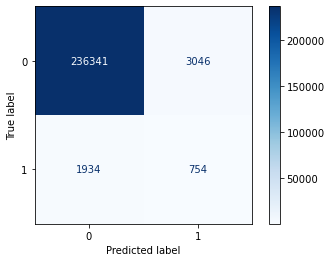

In [116]:
model= BalancedBaggingClassifier()
model.fit(X_train_sampled,y_train_sampled)
predictions=model.predict(X_test)
print(classification_report(y_test,predictions))
disp=plot_confusion_matrix(model,X_test,y_test,display_labels=[0,1],
                          cmap=plt.cm.Blues,values_format='.0f')
plt.show()

### RandomForest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
over=SMOTE(sampling_strategy=0.2)
X_train_over,y_train_over=over.fit_sample(X_train,y_train)

In [113]:
under=RandomUnderSampler(sampling_strategy=0.5)
X_train_sampled,y_train_sampled=under.fit_sample(X_train_over,y_train_over)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    239387
           1       0.25      0.22      0.23      2688

    accuracy                           0.98    242075
   macro avg       0.62      0.60      0.61    242075
weighted avg       0.98      0.98      0.98    242075



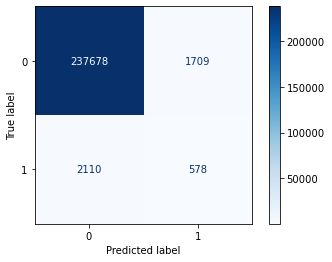

In [114]:
model= RandomForestClassifier(n_estimators=10)
model.fit(X_train_sampled,y_train_sampled)
predictions=model.predict(X_test)
print(classification_report(y_test,predictions))
disp=plot_confusion_matrix(model,X_test,y_test,display_labels=[0,1],
                          cmap=plt.cm.Blues,values_format='.0f')
plt.show()

### RandomForestClassiifer with Class weights

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    239387
           1       0.13      0.18      0.15      2688

    accuracy                           0.98    242075
   macro avg       0.56      0.58      0.57    242075
weighted avg       0.98      0.98      0.98    242075



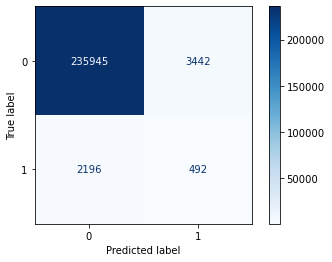

In [115]:
class_weights={
    0:1.,
    1:100.,
}
model= RandomForestClassifier(n_estimators=10,class_weight=class_weights)
model.fit(X_train_sampled,y_train_sampled)
predictions=model.predict(X_test)
print(classification_report(y_test,predictions))
disp=plot_confusion_matrix(model,X_test,y_test,display_labels=[0,1],
                          cmap=plt.cm.Blues,values_format='.0f')
plt.show()

### Easy Ensemble Classifier

In [77]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       1.00      0.86      0.92    239387
           1       0.06      0.84      0.12      2688

    accuracy                           0.86    242075
   macro avg       0.53      0.85      0.52    242075
weighted avg       0.99      0.86      0.91    242075



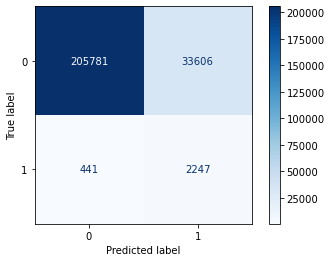

In [176]:

model= EasyEnsembleClassifier(n_estimators=10)
model.fit(X_train_sampled,y_train_sampled)
predictions=model.predict(X_test)
print(classification_report(y_test,predictions))
disp=plot_confusion_matrix(model,X_test,y_test,display_labels=[0,1],
                          cmap=plt.cm.Blues,values_format='.0f')
plt.show()

In [121]:
model= EasyEnsembleClassifier(n_estimators=10)
model.fit(X_train_sampled,y_train_sampled)
predictions=model.predict_proba(X_test)
print(classification_report(predictions,y_test))
disp=plot_confusion_matrix(model,X_test,y_test,display_labels=[0,1],
                        cmap=plt.cm.Blues,values_format='.0f')
plt.show()

In [122]:
predictions

array([[0.5271191 , 0.4728809 ],
       [0.5104863 , 0.4895137 ],
       [0.5212299 , 0.4787701 ],
       ...,
       [0.52047847, 0.47952153],
       [0.52047847, 0.47952153],
       [0.53015799, 0.46984201]])

In [166]:
pr=predictions.copy()

In [167]:
pr=(pr[:,1]>0.50).astype(int)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92    239387
           1       0.06      0.85      0.11      2688

    accuracy                           0.85    242075
   macro avg       0.53      0.85      0.51    242075
weighted avg       0.99      0.85      0.91    242075



<AxesSubplot:>

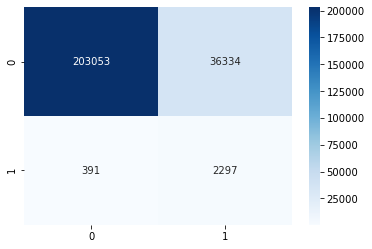

In [168]:
print(classification_report(y_test,pr))
conf_matrix=confusion_matrix(y_test,pr)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap=plt.cm.Blues)
disp=plot_confusion_matrix(model,X_test,y_test,display_labels=[0,1],
                   cmap=plt.cm.Blues,values_format='.0f')
plt.show()

### On Imbalanced Dataset

In [56]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1687860, 15), (1687860,), (242075, 15), (242075,))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    241635
           1       0.04      0.25      0.07       440

    accuracy                           0.99    242075
   macro avg       0.52      0.62      0.53    242075
weighted avg       1.00      0.99      0.99    242075



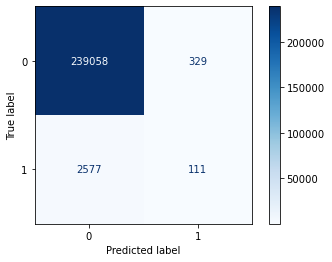

In [57]:
model=KNeighborsClassifier(n_neighbors=5,weights='uniform').fit(X_train,y_train)
predictions=model.predict(X_test)
print(classification_report(y_test,predictions))
disp=plot_confusion_matrix(model,X_test,y_test,display_labels=[0,1],
                          cmap=plt.cm.Blues,values_format='.0f')
plt.show()

### UnderSampling

In [42]:
from sklearn.metrics import plot_confusion_matrix,classification_report,f1_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler

0.8501456160280905
              precision    recall  f1-score   support

           0       0.85      1.00      0.92    204179
           1       0.80      0.06      0.11     37896

    accuracy                           0.85    242075
   macro avg       0.83      0.53      0.51    242075
weighted avg       0.84      0.85      0.79    242075



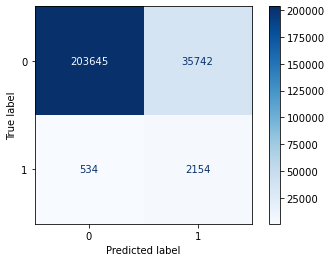

In [47]:
sampler=RandomUnderSampler()
X_train_sampled,y_train_sampled = sampler.fit_resample(X_train,y_train)
model=KNeighborsClassifier(n_neighbors=5,weights='uniform').fit(X_train_sampled,y_train_sampled)
predictions=model.predict(X_test)
print(model.score(X_test,y_test))
print(classification_report(predictioy,test))
disp=plot_confusion_matrix(model,X_test,y_test,display_labels=[0,1],
                          cmap=plt.cm.Blues,values_format='.0f')
plt.show()

### GardientBoostingClassifier

In [50]:
from sklearn.metrics import plot_confusion_matrix,classification_report,f1_score
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler

<IPython.core.display.Javascript object>

0.9067396468036766
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    239387
           1       0.08      0.76      0.15      2688

    accuracy                           0.91    242075
   macro avg       0.54      0.83      0.55    242075
weighted avg       0.99      0.91      0.94    242075



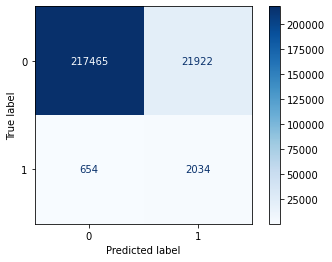

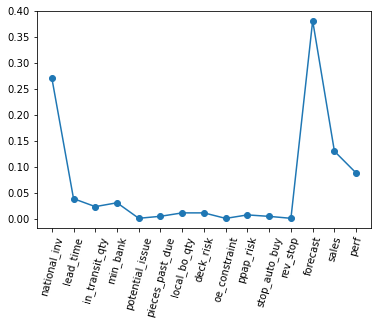

In [120]:
sampler=RandomUnderSampler()
X_train_sampled,y_train_sampled=sampler.fit_resample(X_train,y_train)
model=GradientBoostingClassifier(n_estimators=692, max_depth=9.125954582377464,
                                   learning_rate=0.1854502048266437)
model.fit(X_train_sampled,y_train_sampled)
predictions=model.predict(X_test)
print(model.score(X_test,y_test))
print(classification_report(y_test,predictions))
disp=plot_confusion_matrix(model,X_test,y_test,display_labels=[0,1],
                          cmap=plt.cm.Blues,values_format='.0f')
plt.show()
plt.plot(X_train.columns,model.feature_importances_,marker='o')
plt.xticks(rotation=75)
plt.show()

### Different Feature Engineering

In [56]:
train_df=pd.read_csv('Training.csv',index_col='sku')`
test_df=pd.read_csv('Test.csv',index_col='sku')

In [58]:
# Replacing -99.00 with NaN value in perf_6_month_avg and perf_12_month_avg
train_df['perf_6_month_avg'].replace(-99.00,np.nan,inplace=True)
train_df['perf_12_month_avg'].replace(-99.00,np.nan,inplace=True)

# Replacing -99.00 with NaN value in perf_6_month_avg and perf_12_month_avg
test_df['perf_6_month_avg'].replace(-99.00,np.nan,inplace=True)
test_df['perf_12_month_avg'].replace(-99.00,np.nan,inplace=True)

In [59]:
train_df=train_df[:-1]
test_df=test_df[:-1]

In [61]:
train_df['lead_time']=train_df['lead_time'].fillna(train_df['lead_time'].median())
train_df['perf_6_month_avg']=train_df['perf_6_month_avg'].fillna(train_df['perf_6_month_avg'].median())
train_df['perf_12_month_avg']=train_df['perf_12_month_avg'].fillna(train_df['perf_12_month_avg'].median())

test_df['lead_time']=test_df['lead_time'].fillna(test_df['lead_time'].median())
test_df['perf_6_month_avg']=test_df['perf_6_month_avg'].fillna(test_df['perf_6_month_avg'].median())
test_df['perf_12_month_avg']=test_df['perf_12_month_avg'].fillna(test_df['perf_12_month_avg'].median())

In [62]:
num_feat=train_df.select_dtypes(include='number').columns.to_list()
cat_feat=train_df.select_dtypes(include='object').columns.to_list()

In [63]:
for feat in cat_feat:
    train_df[feat]=train_df[feat].map({
    'Yes':1,
    'No':0
})

In [64]:
for feat in cat_feat:
    test_df[feat]=test_df[feat].map({
    'Yes':1,
    'No':0
})


In [67]:
for feature in train_df.columns:
   print(feature,train_df[feature].skew())

national_inv 340.2858003326191
lead_time 4.695413484039694
in_transit_qty 166.18340424761558
forecast_3_month 138.96832519579834
forecast_6_month 138.96142721254265
forecast_9_month 143.298874740098
sales_1_month 196.1199898556541
sales_3_month 141.2863795444832
sales_6_month 139.17671201086372
sales_9_month 135.05419147168155
min_bank 131.21264893012795
potential_issue 43.103711789548576
pieces_past_due 412.39190039252696
perf_6_month_avg -1.700319497308823
perf_12_month_avg -1.720716663746112
local_bo_qty 165.19054793748316
deck_risk 1.2860556809377883
oe_constraint 82.98335299658959
ppap_risk 2.327643294041299
stop_auto_buy -4.966736885500256
rev_stop 48.02060537030535
went_on_backorder 12.102385054363372


In [69]:
skewed_list=['national_inv','in_transit_qty','forecast_3_month','forecast_6_month',
            'forecast_9_month','sales_1_month','sales_3_month','sales_6_month',
             'sales_9_month','min_bank','pieces_past_due','local_bo_qty',]
log_list=[]
for item in skewed_list:
    log_list.append(train_df.columns.get_loc(item))

In [70]:
log_list

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15]

In [71]:
def log_transform(a):
    sign =np.sign(a[log_list])
    a[log_list]=np.log(1.0+abs(a[log_list]))*sign
    return a

In [72]:
train_df_log=np.apply_along_axis(log_transform,1,train_df)

In [73]:
test_df_log=np.apply_along_axis(log_transform,1,test_df)

In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(train_df_log)

In [75]:
train_df_log=sc.transform(train_df_log)
test_df_log=sc.transform(test_df_log)

In [76]:
train_df_log=pd.DataFrame(train_df_log,columns=train_df.columns)
test_df_log=pd.DataFrame(test_df_log,columns=test_df.columns)

In [80]:
features = ['national_inv', 'lead_time','forecast_3_month', 'sales_1_month', 'pieces_past_due', 'perf_6_month_avg',
            'local_bo_qty', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']

reduced_train_df = train_df[features]
reduced_test_df = test_df[features]

train_label = train_df['went_on_backorder']
test_label = test_df['went_on_backorder']


In [78]:
from sklearn.metrics import plot_confusion_matrix,classification_report,f1_score
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler

0.890240627904575
              precision    recall  f1-score   support

           0       0.89      1.00      0.94    214161
           1       0.75      0.07      0.13     27914

    accuracy                           0.89    242075
   macro avg       0.82      0.53      0.54    242075
weighted avg       0.88      0.89      0.85    242075



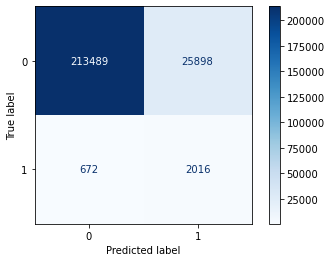

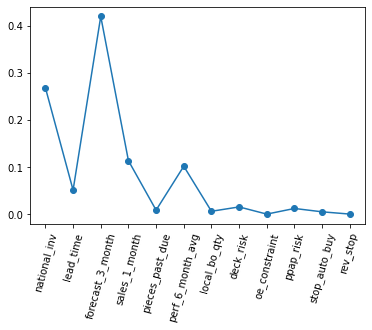

In [81]:
sampler=RandomUnderSampler()
X_train_sampled,y_train_sampled=sampler.fit_resample(reduced_train_df,train_label)
model=GradientBoostingClassifier(n_estimators=692, max_depth=9.125954582377464,
                                   learning_rate=0.1854502048266437)
model.fit(X_train_sampled,y_train_sampled)
predictions=model.predict(reduced_test_df)
print(model.score(reduced_test_df,test_label))
print(classification_report(test_label,predictions))
disp=plot_confusion_matrix(model,reduced_test_df,test_label,display_labels=[0,1],
                          cmap=plt.cm.Blues,values_format='.0f')
plt.show()
plt.plot(reduced_train_df.columns,model.feature_importances_,marker='o')
plt.xticks(rotation=75)
plt.show()

In [82]:
fetaures = ['national_inv', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
                       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'potential_issue',
                       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']

reduced_train_df = train_df[features]
reduced_test_df = test_df[features]

train_label = train_df['went_on_backorder']
test_label = test_df['went_on_backorder']

0.8911535681090571
              precision    recall  f1-score   support

           0       0.89      1.00      0.94    214404
           1       0.75      0.07      0.13     27671

    accuracy                           0.89    242075
   macro avg       0.82      0.53      0.54    242075
weighted avg       0.88      0.89      0.85    242075



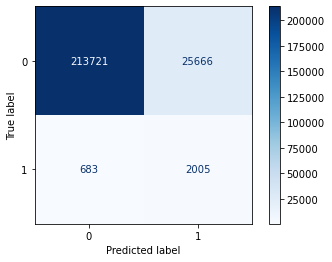

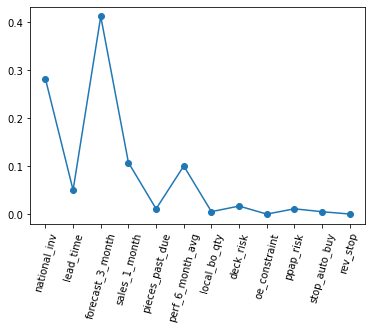

In [83]:
sampler=RandomUnderSampler()
X_train_sampled,y_train_sampled=sampler.fit_resample(reduced_train_df,train_label)
model=GradientBoostingClassifier(n_estimators=692, max_depth=9.125954582377464,
                                   learning_rate=0.1854502048266437)
model.fit(X_train_sampled,y_train_sampled)
predictions=model.predict(reduced_test_df)
print(model.score(reduced_test_df,test_label))
print(classification_report(predictions,test_label))
disp=plot_confusion_matrix(model,reduced_test_df,test_label,display_labels=[0,1],
                          cmap=plt.cm.Blues,values_format='.0f')
plt.show()
plt.plot(reduced_train_df.columns,model.feature_importances_,marker='o')
plt.xticks(rotation=75)
plt.show()